In [32]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the data
data = pd.read_csv('Crime_Data_from_2010_to_2019.csv', parse_dates=['DATE OCC'], dayfirst=True)
data = data[data['DATE OCC'].dt.year <= 2023]
# Set 'DATE OCC' as the index
data.set_index('DATE OCC', inplace=True)

C:\Users\priya\AppData\Local\Temp\ipykernel_90904\3730543590.py:8: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [33]:
# Print the columns of the data
print(data.columns)

Index(['DR_NO', 'Date Rptd', 'TIME OCC', 'AREA ', 'AREA NAME', 'Rpt Dist No',
       'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd',
       'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2',
       'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON'],
      dtype='object')


In [34]:
#Print the some instances of data fot DATE OCC column
print(data.index)

DatetimeIndex(['2010-02-20', '2010-12-09', '2010-09-08', '2010-05-01',
               '2010-02-01', '2010-04-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-06-01',
               ...
               '2019-11-20', '2019-01-20', '2019-02-28', '2019-02-23',
               '2019-02-22', '2019-03-28', '2019-08-14', '2019-06-01',
               '2019-10-16', '2019-01-02'],
              dtype='datetime64[ns]', name='DATE OCC', length=2117589, freq=None)


In [35]:
print(data.tail())

                DR_NO               Date Rptd  TIME OCC  AREA    AREA NAME  \
DATE OCC                                                                     
2019-03-28  190608903  03/28/2019 12:00:00 AM       400      6   Hollywood   
2019-08-14  190715222  08/15/2019 12:00:00 AM      1810      7    Wilshire   
2019-06-01  192004409  01/06/2019 12:00:00 AM      2100     20     Olympic   
2019-10-16  191716777  10/17/2019 12:00:00 AM      1800     17  Devonshire   
2019-01-02  190805435  02/01/2019 12:00:00 AM      1615      8     West LA   

            Rpt Dist No  Part 1-2  Crm Cd  \
DATE OCC                                    
2019-03-28          644         1     648   
2019-08-14          701         1     331   
2019-06-01         2029         2     930   
2019-10-16         1795         1     420   
2019-01-02          852         1     330   

                                                 Crm Cd Desc  \
DATE OCC                                                       
2019-03-2

04:00:15 - cmdstanpy - INFO - Chain [1] start processing
04:00:15 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



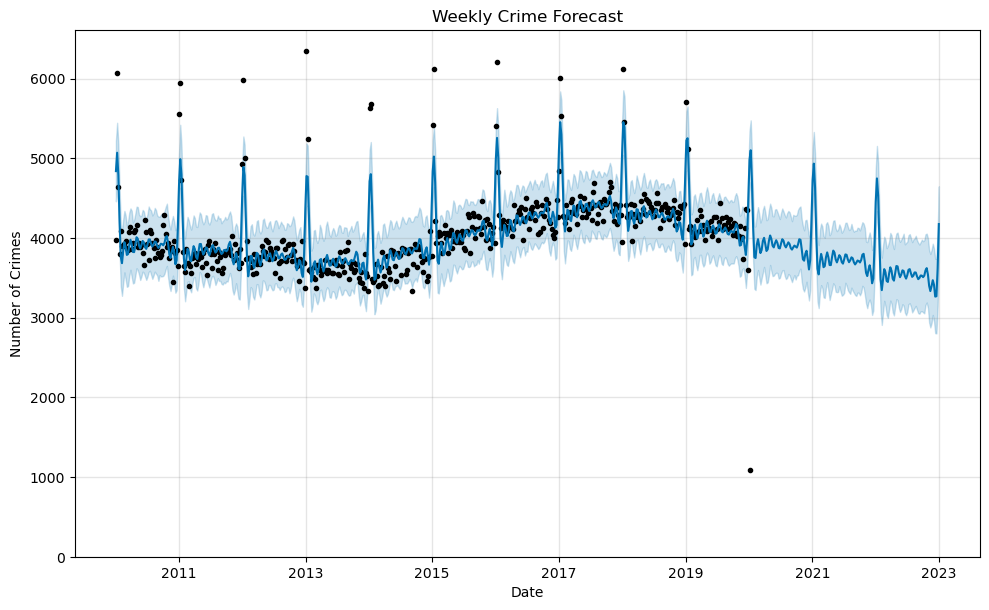

In [36]:
# Weekly Forecast
weekly_crime = data.resample('W').size().reset_index(name='Crime_Count')
weekly_crime.rename(columns={'DATE OCC': 'ds', 'Crime_Count': 'y'}, inplace=True)

# Initialize and fit the model
model_weekly = Prophet()

model_weekly.fit(weekly_crime)

# Create future dataframe for 3 years (156 weeks)
future_weekly = model_weekly.make_future_dataframe(periods=156, freq='W')

# Forecast future crime trends
forecast_weekly = model_weekly.predict(future_weekly)

# Set negative forecasts to zero
forecast_weekly[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_weekly[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)

# Plot the forecast with adjusted y-axis
fig = model_weekly.plot(forecast_weekly)
plt.title('Weekly Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.ylim(bottom=0)
plt.show()

In [37]:
# Remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

04:00:17 - cmdstanpy - INFO - Chain [1] start processing
04:00:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



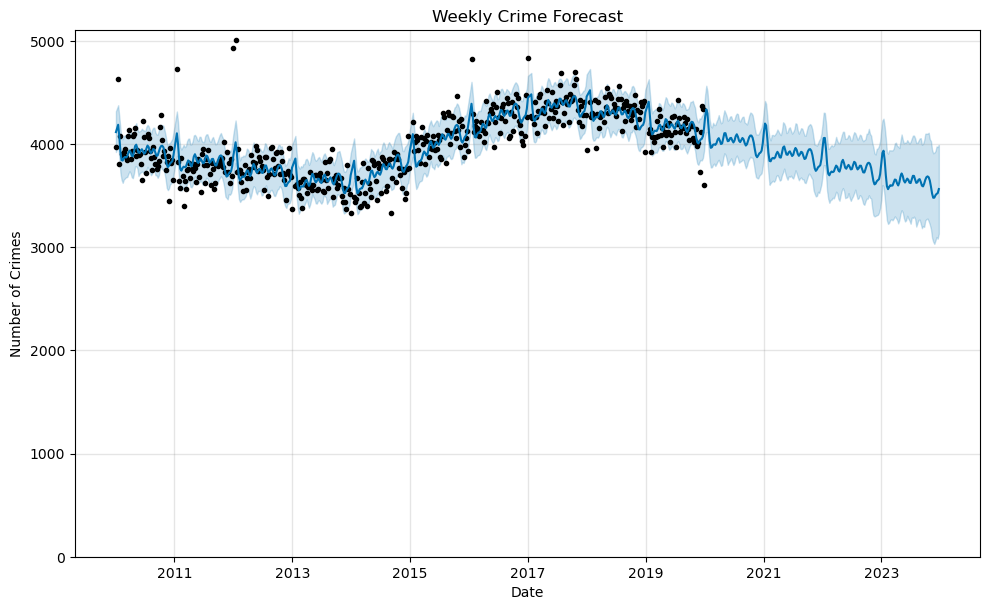

In [ ]:
# Aggregate crime counts per week
weekly_crime = data.resample('W').size().reset_index(name='Crime_Count')

# Remove outliers
weekly_crime = remove_outliers(weekly_crime, 'Crime_Count')

# Rename columns for Prophet
weekly_crime.rename(columns={'DATE OCC': 'ds', 'Crime_Count': 'y'}, inplace=True)

# Initialize and fit the Prophet model
#Use Arnn model or Arima model for better prediction
model_weekly = Prophet()
model_weekly.fit(weekly_crime)

# Create future dataframe for 4 years (208 weeks)
future_weekly = model_weekly.make_future_dataframe(periods=208, freq='W')

# Forecast future crime trends
forecast_weekly = model_weekly.predict(future_weekly)

# Set negative forecasts to zero
forecast_weekly[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_weekly[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)

fig = model_weekly.plot(forecast_weekly)
plt.title('Weekly Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.ylim(bottom=0)
plt.show()

In [39]:
# # Monthly Forecast
# monthly_crime = data.resample('M').size().reset_index(name='Crime_Count')
# monthly_crime.rename(columns={'DATE OCC': 'ds', 'Crime_Count': 'y'}, inplace=True)

# # Initialize and fit the model
# model_monthly = Prophet()

# model_monthly.fit(monthly_crime)

# # Create future dataframe for 3 years (36 months)
# future_monthly = model_monthly.make_future_dataframe(periods=36, freq='M')

# # Forecast future crime trends
# forecast_monthly = model_monthly.predict(future_monthly)

# # Set negative forecasts to zero
# forecast_monthly[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_monthly[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)

# # Plot the forecast with adjusted y-axis
# fig = model_monthly.plot(forecast_monthly)
# plt.title('Monthly Crime Forecast')
# plt.xlabel('Date')
# plt.ylabel('Number of Crimes')
# plt.ylim(bottom=0)
# plt.show()

In [40]:
# # Monthly Forecast
# # Aggregate crime counts per month
# monthly_crime = data.resample('M').size().reset_index(name='Crime_Count')

# # Remove outliers
# monthly_crime = remove_outliers(monthly_crime, 'Crime_Count')

# # Rename columns for Prophet
# monthly_crime.rename(columns={'DATE OCC': 'ds', 'Crime_Count': 'y'}, inplace=True)

# # Initialize and fit the Prophet model
# model_monthly = Prophet()
# model_monthly.fit(monthly_crime)

# # Create future dataframe for 3 years (36 months)
# future_monthly = model_monthly.make_future_dataframe(periods=36, freq='M')

# # Forecast future crime trends
# forecast_monthly = model_monthly.predict(future_monthly)

# # Set negative forecasts to zero
# forecast_monthly[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_monthly[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)

# # Plot the forecast with adjusted y-axis
# fig = model_monthly.plot(forecast_monthly)
# plt.title('Monthly Crime Forecast')
# plt.xlabel('Date')
# plt.ylabel('Number of Crimes')
# plt.ylim(bottom=0)
# plt.show()

In [41]:
# # Yearly Forecast
# yearly_crime = data.resample('Y').size().reset_index(name='Crime_Count')
# yearly_crime.rename(columns={'DATE OCC': 'ds', 'Crime_Count': 'y'}, inplace=True)

# # Initialize and fit the model
# model_yearly = Prophet()

# model_yearly.fit(yearly_crime)

# # Create future dataframe for 3 years
# future_yearly = model_yearly.make_future_dataframe(periods=3, freq='Y')

# # Forecast future crime trends
# forecast_yearly = model_yearly.predict(future_yearly)

# # Set negative forecasts to zero
# forecast_yearly[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_yearly[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)

# # Plot the forecast with adjusted y-axis
# fig = model_yearly.plot(forecast_yearly)
# plt.title('Yearly Crime Forecast')
# plt.xlabel('Date')
# plt.ylabel('Number of Crimes')
# plt.ylim(bottom=0)
# plt.show()

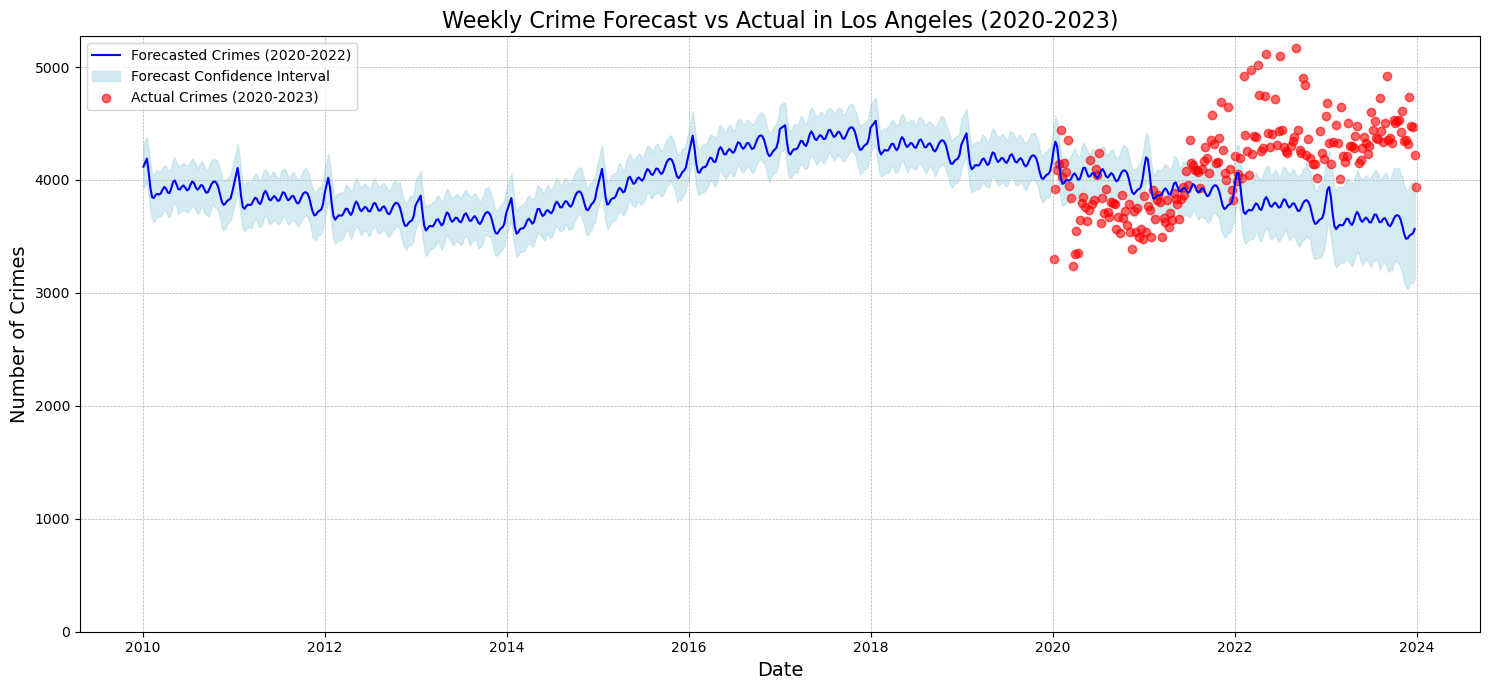

In [42]:
# Load Actual Data
actual_data = pd.read_csv('Cleaned_LA_Dataset.csv', parse_dates=['DATE OCC'], dayfirst=True)

# Filter actual data for the period 2020-2023
actual_data = actual_data[(actual_data['DATE OCC'].dt.year >= 2020) & (actual_data['DATE OCC'].dt.year <= 2023)]

# Set 'DATE OCC' as the index
actual_data.set_index('DATE OCC', inplace=True)

# Aggregate crime counts per week
actual_weekly = actual_data.resample('W').size().reset_index(name='Actual_Crime_Count')

# Remove outliers
actual_weekly = remove_outliers(actual_weekly, 'Actual_Crime_Count')

# Rename columns for consistency
actual_weekly.rename(columns={'DATE OCC': 'ds', 'Actual_Crime_Count': 'y'}, inplace=True)

# Plot using Matplotlib
plt.figure(figsize=(15, 7))

# Plot Forecasted Data
plt.plot(forecast_weekly['ds'], forecast_weekly['yhat'], label='Forecasted Crimes (2020-2022)', color='blue')
plt.fill_between(
    forecast_weekly['ds'],
    forecast_weekly['yhat_lower'],
    forecast_weekly['yhat_upper'],
    color='lightblue',
    alpha=0.5,
    label='Forecast Confidence Interval'
)

# Plot Actual Data
plt.scatter(actual_weekly['ds'], actual_weekly['y'], color='red', label='Actual Crimes (2020-2023)', alpha=0.6)

# Customize Plot
plt.title('Weekly Crime Forecast vs Actual in Los Angeles (2020-2023)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(bottom=0)  # Ensure y-axis starts at zero
plt.tight_layout()
plt.show()

# Alternatively, Plot using Plotly for Interactivity
fig = go.Figure()

# Add Forecasted Data
fig.add_trace(
    go.Scatter(
        x=forecast_weekly['ds'],
        y=forecast_weekly['yhat'],
        mode='lines',
        name='Forecasted Crimes (2020-2022)',
        line=dict(color='blue')
    )
)

# Add Confidence Interval
fig.add_trace(
    go.Scatter(
        x=pd.concat([forecast_weekly['ds'], forecast_weekly['ds'][::-1]]),
        y=pd.concat([forecast_weekly['yhat_upper'], forecast_weekly['yhat_lower'][::-1]]),
        fill='toself',
        fillcolor='rgba(173,216,230,0.2)',
        line=dict(color='lightblue'),
        hoverinfo="skip",
        showlegend=True,
        name='Forecast Confidence Interval'
    )
)

# Add Actual Data
fig.add_trace(
    go.Scatter(
        x=actual_weekly['ds'],
        y=actual_weekly['y'],
        mode='markers',
        name='Actual Crimes (2020-2023)',
        marker=dict(color='red', size=5),
        hoverinfo='x+y'
    )
)

# Customize Layout
fig.update_layout(
    title='Weekly Crime Forecast vs Actual in Los Angeles (2020-2023)',
    xaxis_title='Date',
    yaxis_title='Number of Crimes',
    yaxis=dict(range=[0, max(forecast_weekly['yhat_upper'].max(), actual_weekly['y'].max()) * 1.1]),
    template='plotly_white',
    hovermode='x unified',
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255,255,255,0)')
)

# Show the interactive plot
fig.show()